## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
## <div align="center"> Semester Genap 2022/2023 </div>
### <div align="center"> WEEK [04] : [Linear Discriminant Analysis] </div>


### Header

In [1]:
import datetime
import uuid    

# Fill in your name and NIM
myName = "Gempar Bambang Godata"
myNIM = "67643"

myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

# Header
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Gempar Bambang Godata
NIM: 		67643
Start: 		2023-03-04 12:13:18.456145
Device ID: 	4663052c-ba4b-11ed-8066-d73d74f87ac4


### Deskripsi Singkat Dataset:

- Dataset 1: LoL Diamond Games dataset berisi tentang statistik semua pertandingan di ranked Diamond server NA1 selama 15 menit pertama
- Dataset 2: Abalone Dataset, berisi tentang karakteristik dari kerang Abalone meliputi ukuran, berat, dan jenis kelamin kerang


---

### Dataset yang diambil dari repositori:

1. League of Legends Diamond Games (First 15 Minutes) – sumber : https://www.kaggle.com/datasets/benfattori/league-of-legends-diamond-games-first-15-minutes
2. Abalone Data Set – sumber : https://archive.ics.uci.edu/ml/datasets/abalone


## Modul LDA technique for Dimensionality Reduction

### Part 1: Data Preprocessing

#### 1.1 Import the Libraries

In [3]:
# import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.2 Import the dataset

In [4]:
# import the dataset
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, :13].values
Y = dataset.iloc[:, 13].values

#### 1.3 Split the dataset for test and train

In [5]:
# spliting the dataset into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

#### Feature Scaling

In [6]:
# feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Part 2: Building a Linear Discriminant analysis for Dimensionality Reduction

#### 2.1 Import the Libraries

In [7]:
# import LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#### 2.2 Initialize our model

In [8]:
# initialize the LDA
lda = LDA(n_components = 2)

#### 2.3 Fitting the Model

In [9]:
# fitting the LDA model
X_test = lda.fit_transform(X_test, y_test)
X_train = lda.transform(X_train)

#### 3.1 Import the Libraries

In [10]:
# import the Logistic Regression model from sklearn using the 2 variances with the help of LDA
from sklearn.linear_model import LogisticRegression

#### 3.2 Initialize our Logistic Regression model

In [11]:
LG=LogisticRegression(random_state=0)

#### 3.3 Fitting the Model

In [12]:
# fit the Logistic Regression model
LG.fit(X_train,y_train)

LogisticRegression(random_state=0)

### Part 4: Making a Prediction and Visualize the result

#### 4.1 Predict the test set Result

In [13]:
# predict the Logistic regression model
y_pred=LG.predict(X_test)

#### 4.2 Confusion Metric 

<AxesSubplot:>

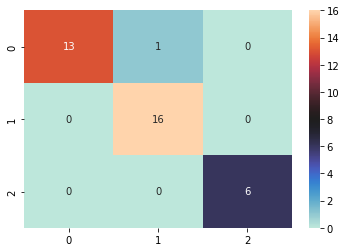

In [14]:
# making a confusion metrics
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)

sns.heatmap(confusion_matrix, annot=True, cmap="icefire")

#### 4.3 Visualize our Test Set Result 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


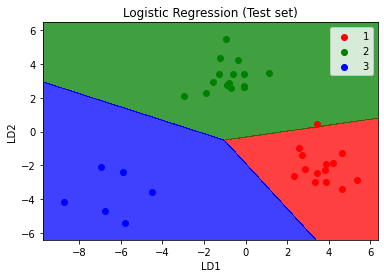

In [15]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, LG.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
            c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

## Tugas dengan Dataset Sendiri
### Dataset 2

In [16]:
# import the dataset & libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

dataset2 = pd.read_csv('MatchTimelinesFirst15.csv')
dataset2

,matchId,blue_win,blueGold,blueMinionsKilled,blueJungleMinionsKilled,blueAvgLevel,redGold,redMinionsKilled,redJungleMinionsKilled,redAvgLevel,blueChampKills,blueHeraldKills,blueDragonKills,blueTowersDestroyed,redChampKills,redHeraldKills,redDragonKills,redTowersDestroyed
0,3493250918,0,24575,349,89,8.6,25856,346,80,9.2,6,1,0,1,12,2,0,1
1,3464936341,0,27210,290,36,9.0,28765,294,92,9.4,20,0,0,0,19,2,0,0
2,3428425921,1,32048,346,92,9.4,25305,293,84,9.4,17,3,0,0,11,0,0,4
3,3428347390,0,20261,223,60,8.2,30429,356,107,9.4,7,0,0,3,16,3,0,0
4,3428350940,1,30217,376,110,9.8,23889,334,60,8.8,16,3,0,0,8,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48646,3475682007,0,27013,338,61,9.0,31853,331,77,9.6,14,2,0,2,21,0,0,0
48647,3500987969,1,25376,350,91,9.0,23786,354,87,9.4,7,2,0,0,5,1,0,1
48648,3496592883,0,25456,308,92,9.0,29569,344,96,9.6,8,0,0,2,17,3,0,1
48649,3491705900,1,27033,335,85,9.4,25666,316,64,8.8,14,2,0,0,12,0,0,0


In [17]:
dataset2 = dataset2.drop(columns = ['matchId','blueGold','redGold'])
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48651 entries, 0 to 48650
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   blue_win                 48651 non-null  int64  
 1   blueMinionsKilled        48651 non-null  int64  
 2   blueJungleMinionsKilled  48651 non-null  int64  
 3   blueAvgLevel             48651 non-null  float64
 4   redMinionsKilled         48651 non-null  int64  
 5   redJungleMinionsKilled   48651 non-null  int64  
 6   redAvgLevel              48651 non-null  float64
 7   blueChampKills           48651 non-null  int64  
 8   blueHeraldKills          48651 non-null  int64  
 9   blueDragonKills          48651 non-null  int64  
 10  blueTowersDestroyed      48651 non-null  int64  
 11  redChampKills            48651 non-null  int64  
 12  redHeraldKills           48651 non-null  int64  
 13  redDragonKills           48651 non-null  int64  
 14  redTowersDestroyed    

In [18]:
X = dataset2.iloc[:, :10].values
Y = dataset2.iloc[:, 10].values

In [19]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48651 entries, 0 to 48650
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   blue_win                 48651 non-null  int64  
 1   blueMinionsKilled        48651 non-null  int64  
 2   blueJungleMinionsKilled  48651 non-null  int64  
 3   blueAvgLevel             48651 non-null  float64
 4   redMinionsKilled         48651 non-null  int64  
 5   redJungleMinionsKilled   48651 non-null  int64  
 6   redAvgLevel              48651 non-null  float64
 7   blueChampKills           48651 non-null  int64  
 8   blueHeraldKills          48651 non-null  int64  
 9   blueDragonKills          48651 non-null  int64  
 10  blueTowersDestroyed      48651 non-null  int64  
 11  redChampKills            48651 non-null  int64  
 12  redHeraldKills           48651 non-null  int64  
 13  redDragonKills           48651 non-null  int64  
 14  redTowersDestroyed    

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [21]:
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [23]:
lda = LDA(n_components = 2)

In [24]:
X_test = lda.fit_transform(X_test, y_test)
X_train = lda.transform(X_train)

In [25]:
from sklearn.linear_model import LogisticRegression
LG=LogisticRegression(random_state=0)

In [26]:
LG.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [27]:
y_pred=LG.predict(X_test)

<AxesSubplot:>

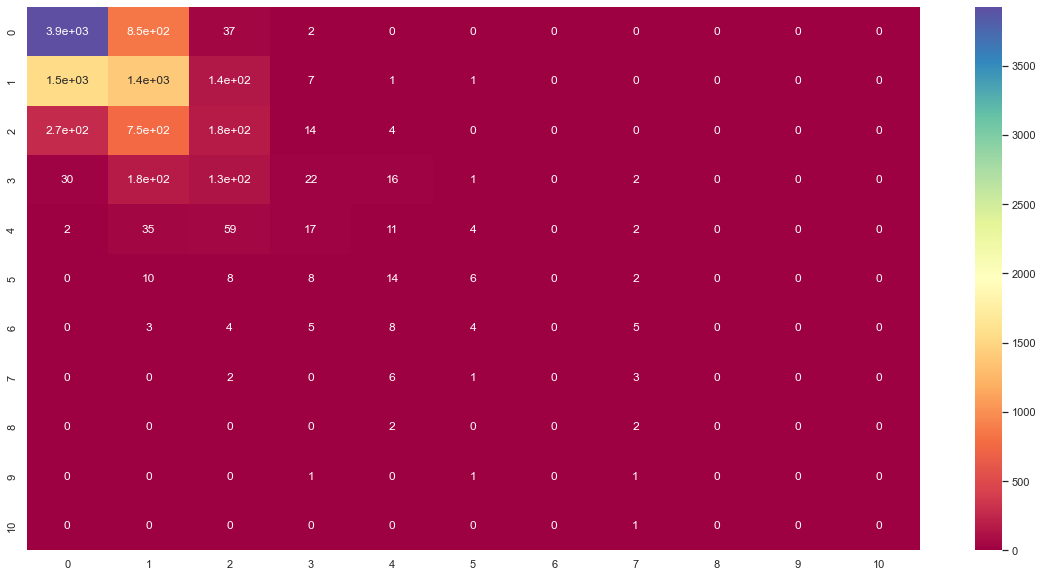

In [28]:
# making a confusion metrics
from sklearn.metrics import confusion_matrix
sns.set(rc={"figure.figsize":(20, 10)})
confusion_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix, annot=True, cmap="Spectral")

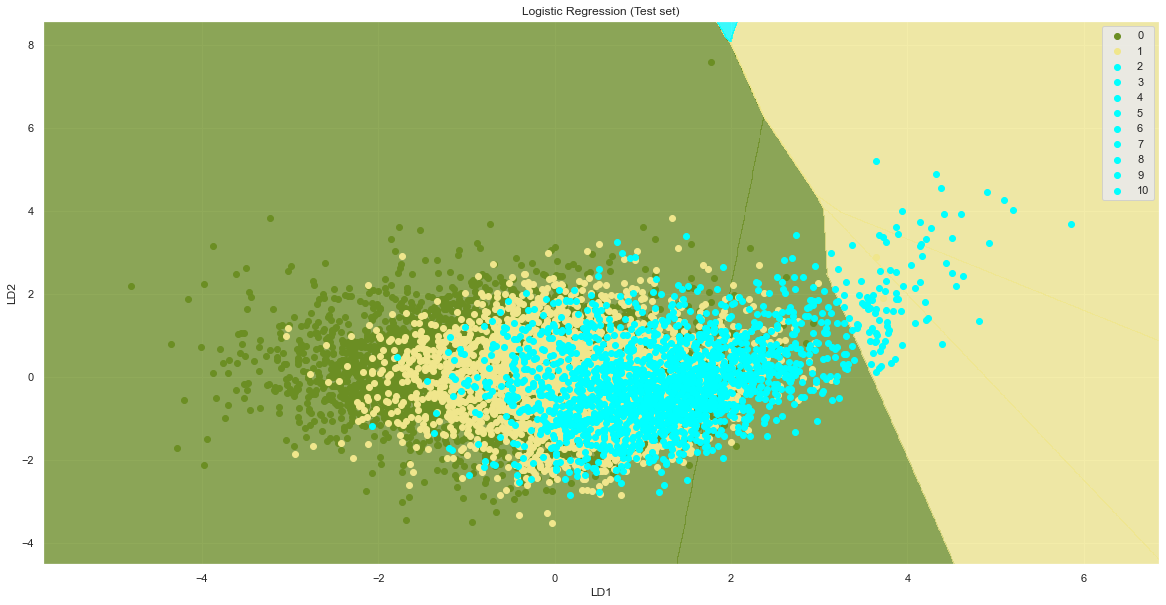

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
from matplotlib.colors import ListedColormap

warnings.filterwarnings('ignore')

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, 
                               stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, LG.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('olivedrab', 'khaki', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('olivedrab', 'khaki', 'cyan'))(i), label=j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()


### Dataset 3

In [40]:
dataset3 = pd.read_csv('abalone.csv')
dataset3

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [41]:
dataset3 = dataset3.drop(columns = ['Sex'])
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


In [42]:
X = dataset3.iloc[:, :7].values
Y = dataset3.iloc[:, 7].values

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [44]:
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [46]:
lda = LDA(n_components = 2)

In [47]:
X_test = lda.fit_transform(X_test, y_test)
X_train = lda.transform(X_train)

In [48]:
from sklearn.linear_model import LogisticRegression
LG=LogisticRegression(random_state=0)

In [49]:
LG.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [50]:
y_pred=LG.predict(X_test)

<AxesSubplot:>

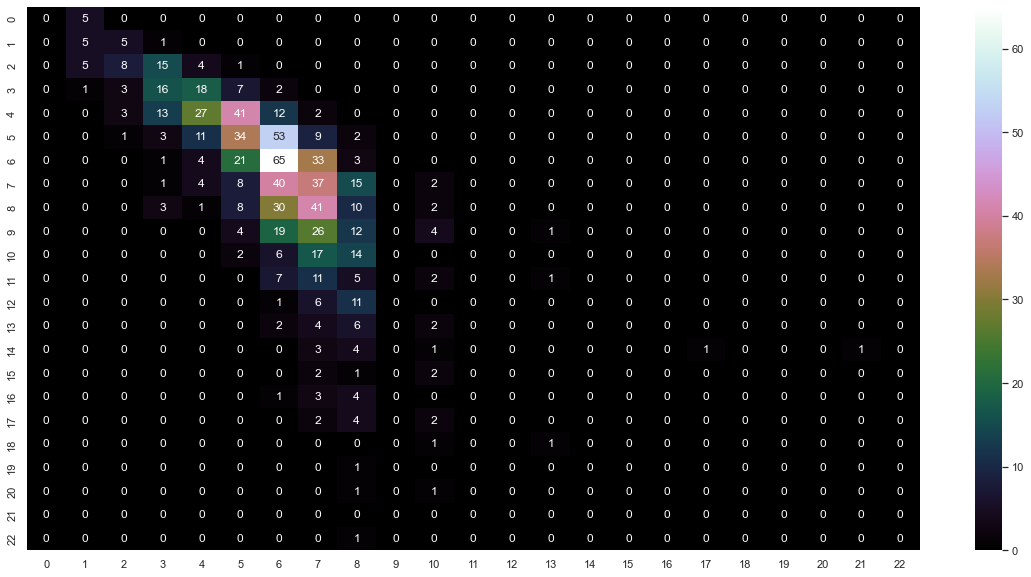

In [52]:
# making a confusion metrics
from sklearn.metrics import confusion_matrix
sns.set(rc={"figure.figsize":(20, 10)})
confusion_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix, annot=True, cmap="cubehelix")

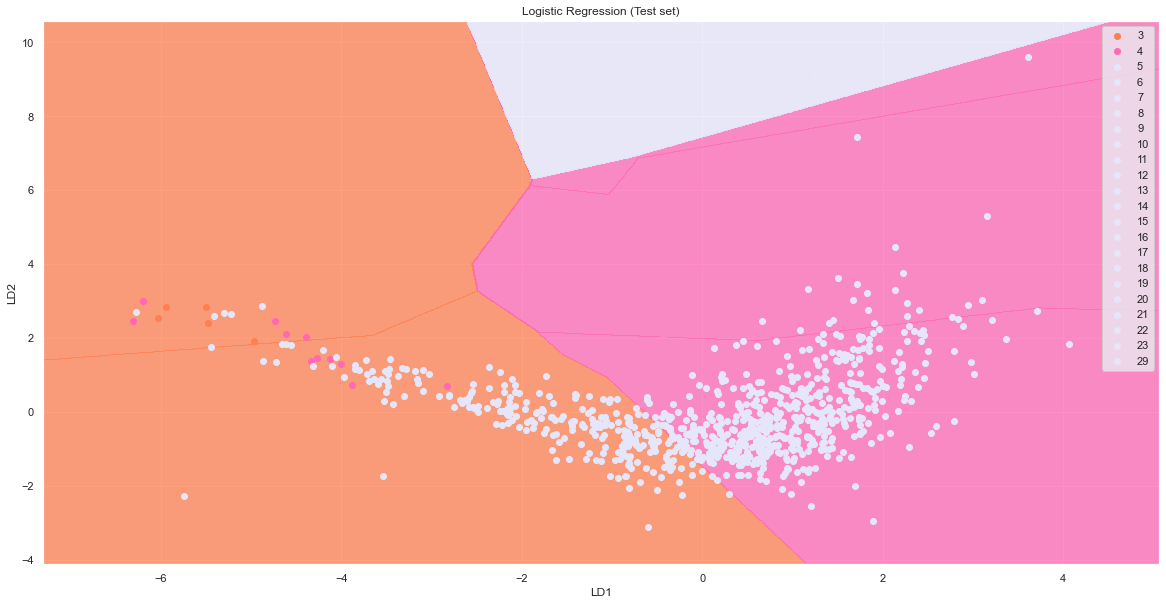

In [56]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, 
                               stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, LG.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('coral', 'hotpink', 'lavender')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('coral', 'hotpink', 'lavender'))(i), label=j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()


### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - Dataset 2 menghasilkan confusion matrix yang berbeda dari dataset 3. Perbedaan tersebut menandakan bahwa dataset 3 dataset memiliki distribusi normal dan varian yang sama untuk setiap kelas. Jika asumsi ini tidak terpenuhi, maka LDA mungkin tidak menghasilkan hasil yang akurat seperti dataset 2
    - LDA memungkinkan untuk mengurangi dimensi dataset dengan memilih kombinasi linier dari features yang paling baik membedakan kelas-kelas dataset.
    - Hasil LDA dapat digunakan untuk memvisualisasikan data dalam 2 atau 3 dimensi sehingga memudahkan dalam interpretasi dan pemahaman hasil analisis data.

In [30]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 		Gempar Bambang Godata
NIM: 		67643
Time-stamp:	2023-03-04 12:13:25.761089


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [57]:
!jupyter nbconvert --to html "./IF540L_kelas_A_laporan_M04_67643_Gempar Bambang Godata.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IF540L_kelas_A_laporan_M04_67643_Gempar Bambang Godata.ipynb to html
[NbConvertApp] Writing 1027532 bytes to IF540L_kelas_A_laporan_M04_67643_Gempar Bambang Godata.html


### Next step:
* convert the generated html file to PDF using the online tool: https://www.sejda.com/html-to-pdf
* choose the following settings:
    * Page size: One long page
    * Page Orientation: auto
    * Use print stylesheet
* Submit your ipython notebook and PDF files

Markdown basics https://markdown-guide.readthedocs.io/en/latest/basics.html#